In [124]:
import numpy as np
import matplotlib.pyplot as plt
from utils import e_greedy_bandit, UCB_bandit, gradient_bandit

In [125]:
import importlib
import utils
importlib.reload(utils)
from utils import e_greedy_bandit, UCB_bandit, gradient_bandit

In [132]:
k = 10
max_steps = 1000
nb_runs = 2000

In [102]:
eps = [2**-i for i in range(7,1,-1)]
avg_e_greedy_reward = []
for e in eps:
    reward = np.zeros(max_steps) 
    for i in range(nb_runs):
        reward += e_greedy_bandit(k, max_steps, e, stationnary=False, alpha=0.1)
    avg_e_greedy_reward.append(np.mean(reward/nb_runs))

In [103]:
inits = [2**i for i in range(-2,3,1)]
avg_optimistic_greedy_reward = []
for init in inits:
    reward = np.zeros(max_steps) 
    for i in range(nb_runs):
        reward += e_greedy_bandit(k, max_steps, 0, stationnary=False, alpha=0.1, init=init)
    avg_optimistic_greedy_reward.append(np.mean(reward/nb_runs))

In [133]:
degree = [2**i for i in range(-3,3,1)]
avg_UCB_reward = []
for c in degree:
    reward = np.zeros(max_steps) 
    for i in range(nb_runs):
        reward += UCB_bandit(k, max_steps, c, stationnary=False, alpha=0.1)
    avg_UCB_reward.append(np.mean(reward/nb_runs))

In [134]:
step = [2**i for i in range(-4,3,1)]
avg_grad_reward = []
for alpha in step:
    reward = np.zeros(max_steps) 
    for i in range(nb_runs):
        reward += gradient_bandit(k, max_steps, alpha, stationnary=False)
    avg_grad_reward.append(np.mean(reward/nb_runs))

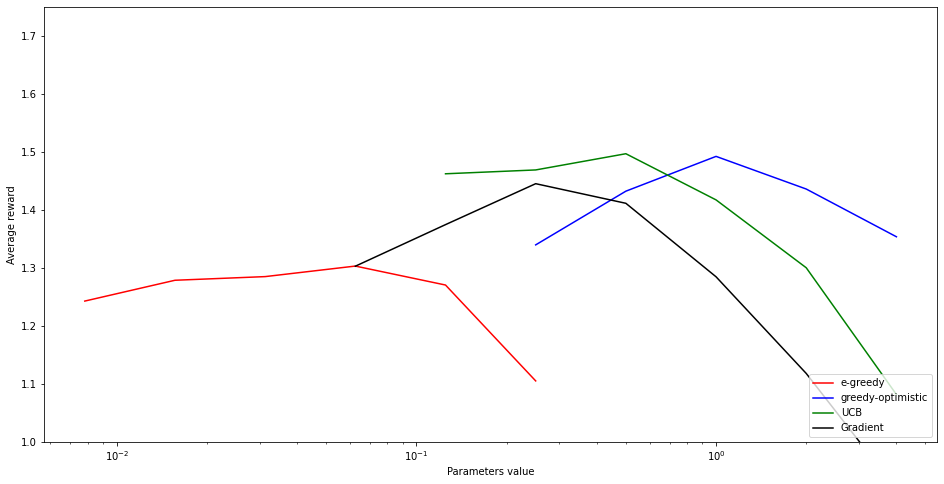

In [146]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(eps, avg_e_greedy_reward, color = 'Red', label = 'e-greedy')
ax.plot(inits, avg_optimistic_greedy_reward, color = 'Blue', label = 'greedy-optimistic')
ax.plot(degree, avg_UCB_reward, color = 'Green', label = 'UCB')
ax.plot(step, avg_grad_reward, color = 'Black', label = 'Gradient')
plt.ylabel('Average reward')
plt.xlabel('Parameters value')
plt.legend(loc="lower right")
plt.ylim([1, 1.75])
ax.set_xscale('log')
plt.savefig('parameter_study.pdf')
plt.show()